In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
loan4 = pd.read_csv('new_loan1.csv')
loan4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,Default_Binary
0,5000.0,5000.0,4975.0,0.1065,162.87,B,10.0,RENT,24000.0,credit_card,...,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0
1,2500.0,2500.0,2500.0,0.1527,59.83,C,1.0,RENT,30000.0,car,...,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1
2,2400.0,2400.0,2400.0,0.1596,84.33,C,10.0,RENT,12252.0,small_business,...,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0
3,10000.0,10000.0,10000.0,0.1349,339.31,C,10.0,RENT,49200.0,other,...,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0
4,3000.0,3000.0,3000.0,0.1269,67.79,B,1.0,RENT,80000.0,other,...,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0


In [3]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
loan_amnt                  887379 non-null float64
funded_amnt                887379 non-null float64
funded_amnt_inv            887379 non-null float64
int_rate                   887379 non-null float64
installment                887379 non-null float64
grade                      887379 non-null object
emp_length                 887379 non-null float64
home_ownership             887379 non-null object
annual_inc                 887379 non-null float64
purpose                    887379 non-null object
addr_state                 887379 non-null object
dti                        887379 non-null float64
delinq_2yrs                887350 non-null float64
inq_last_6mths             887350 non-null float64
open_acc                   887350 non-null float64
pub_rec                    887350 non-null float64
revol_bal                  887379 non-null float64
total_acc                 

In [4]:
loan4.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,Default_Binary
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887350.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,14755.264605,14741.877625,14702.464383,0.132467,436.717127,6.087822,7.502759e+04,18.157039,0.314442,0.694623,...,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.075987
std,8435.455601,8429.897657,8442.106732,0.043819,244.186593,3.446576,6.469815e+04,17.190626,0.862244,0.998448,...,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.264977
min,500.000000,500.000000,0.000000,0.053200,15.670000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,0.099900,260.705000,3.000000,4.500000e+04,11.910000,0.000000,0.000000,...,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000
50%,13000.000000,13000.000000,13000.000000,0.129900,382.550000,6.000000,6.500000e+04,17.650000,0.000000,0.000000,...,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000
75%,20000.000000,20000.000000,20000.000000,0.162000,572.600000,10.000000,9.000000e+04,23.950000,0.000000,1.000000,...,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000
max,35000.000000,35000.000000,35000.000000,0.289900,1445.460000,10.000000,9.500000e+06,9999.000000,39.000000,33.000000,...,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,1.000000


#### - The metrics delinq_2yrs is very skewed towards zero (80% are zeros). Let's make it categorical: no when delinq_2yrs == 0 and yes when  delinq_2yrs > 0

#### - Same as above for inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries).

In [5]:
loan4['delinq_2yrs_cat'] = 'no'
loan4.loc[loan4['delinq_2yrs']> 0,'delinq_2yrs_cat'] = 'yes'

loan4['inq_last_6mths_cat'] = 'no'
loan4.loc[loan4['inq_last_6mths']> 0,'inq_last_6mths_cat'] = 'yes'

loan4['rec_late_fee'] = 'no'
loan4.loc[loan4['total_rec_late_fee']> 0,'rec_late_fee'] = 'yes'

loan4['recoveries_cat'] = 'no'
loan4.loc[loan4['recoveries']> 0,'recoveries_cat'] = 'yes'

loan4['collection_recovery_fee_cat'] = 'no'
loan4.loc[loan4['collection_recovery_fee']> 0,'collection_recovery_fee_cat'] = 'yes'

loan4['pub_rec_cat'] = 'no'
loan4.loc[loan4['recoveries']> 0,'recoveries_cat'] = 'yes'

In [6]:
loan4['pub_rec_cat'] = 'no'
loan4.loc[loan4['pub_rec']> 0,'pub_rec_cat'] = 'yes'

In [7]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 36 columns):
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
emp_length                     887379 non-null float64
home_ownership                 887379 non-null object
annual_inc                     887379 non-null float64
purpose                        887379 non-null object
addr_state                     887379 non-null object
dti                            887379 non-null float64
delinq_2yrs                    887350 non-null float64
inq_last_6mths                 887350 non-null float64
open_acc                       887350 non-null float64
pub_rec                        887350 non-null float64
revol_bal    

In [8]:
loan4.drop(['delinq_2yrs','inq_last_6mths','total_rec_late_fee','recoveries','collection_recovery_fee','pub_rec'], axis=1, inplace=True)

In [9]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
emp_length                     887379 non-null float64
home_ownership                 887379 non-null object
annual_inc                     887379 non-null float64
purpose                        887379 non-null object
addr_state                     887379 non-null object
dti                            887379 non-null float64
open_acc                       887350 non-null float64
revol_bal                      887379 non-null float64
total_acc                      887350 non-null float64
initial_list_status            887379 non-null object
out_prncp     

In [10]:
features = ['delinq_2yrs_cat','inq_last_6mths_cat','rec_late_fee','recoveries_cat','collection_recovery_fee_cat','pub_rec_cat',
           'initial_list_status','purpose','home_ownership','grade']

In [11]:
final_loan = pd.get_dummies(loan4, columns = features)
final_loan.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,addr_state,dti,open_acc,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000.0,5000.0,4975.0,0.1065,162.87,10.0,24000.0,AZ,27.65,3.0,...,0,0,1,0,1,0,0,0,0,0
1,2500.0,2500.0,2500.0,0.1527,59.83,1.0,30000.0,GA,1.00,3.0,...,0,0,1,0,0,1,0,0,0,0
2,2400.0,2400.0,2400.0,0.1596,84.33,10.0,12252.0,IL,8.72,2.0,...,0,0,1,0,0,1,0,0,0,0
3,10000.0,10000.0,10000.0,0.1349,339.31,10.0,49200.0,CA,20.00,10.0,...,0,0,1,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,0.1269,67.79,1.0,80000.0,OR,17.94,15.0,...,0,0,1,0,1,0,0,0,0,0
5,5000.0,5000.0,5000.0,0.0790,156.46,3.0,36000.0,AZ,11.20,9.0,...,0,0,1,1,0,0,0,0,0,0
6,7000.0,7000.0,7000.0,0.1596,170.08,8.0,47004.0,NC,23.51,7.0,...,0,0,1,0,0,1,0,0,0,0
7,3000.0,3000.0,3000.0,0.1864,109.43,9.0,48000.0,CA,5.35,4.0,...,0,0,1,0,0,0,0,1,0,0
8,5600.0,5600.0,5600.0,0.2128,152.39,4.0,40000.0,CA,5.55,11.0,...,0,1,0,0,0,0,0,0,1,0
9,5375.0,5375.0,5350.0,0.1269,121.45,1.0,15000.0,TX,18.08,2.0,...,0,0,1,0,1,0,0,0,0,0


In [12]:
final_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 61 columns):
loan_amnt                          887379 non-null float64
funded_amnt                        887379 non-null float64
funded_amnt_inv                    887379 non-null float64
int_rate                           887379 non-null float64
installment                        887379 non-null float64
emp_length                         887379 non-null float64
annual_inc                         887379 non-null float64
addr_state                         887379 non-null object
dti                                887379 non-null float64
open_acc                           887350 non-null float64
revol_bal                          887379 non-null float64
total_acc                          887350 non-null float64
out_prncp                          887379 non-null float64
out_prncp_inv                      887379 non-null float64
total_pymnt                        887379 non-null float64
total

In [13]:
final_loan.drop('addr_state', axis = 1, inplace = True)

### standardization.

In [16]:
stand = final_loan[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt']]

In [17]:
normalized = (stand-stand.min())/(stand.max()-stand.min())

In [18]:
final_loan = final_loan.drop(['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt'], 1)

In [19]:
final_loan = pd.concat([final_loan, normalized], axis =1)

In [20]:
final_loan.head()

,Default_Binary,delinq_2yrs_cat_no,delinq_2yrs_cat_yes,inq_last_6mths_cat_no,inq_last_6mths_cat_yes,rec_late_fee_no,rec_late_fee_yes,recoveries_cat_no,recoveries_cat_yes,collection_recovery_fee_cat_no,...,open_acc,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,0,1,0,0,1,1,0,1,0,1,...,0.033333,0.004698,0.047619,0.000000,0.000000,0.101442,0.100935,0.142857,0.035573,0.004705
1,1,1,0,0,1,1,0,0,1,0,...,0.033333,0.000581,0.017857,0.000000,0.000000,0.017459,0.017459,0.013042,0.017978,0.003281
2,0,1,0,0,1,1,0,1,0,1,...,0.022222,0.001018,0.053571,0.000000,0.000000,0.051986,0.051986,0.068571,0.024938,0.017818
3,0,1,0,0,1,0,1,1,0,1,...,0.111111,0.001927,0.214286,0.000000,0.000000,0.211610,0.211610,0.285714,0.091273,0.009801
4,0,1,0,1,0,1,0,1,0,1,...,0.166667,0.009564,0.220238,0.015533,0.015533,0.056115,0.056115,0.063803,0.041687,0.001859


In [21]:
final_loan.isnull().sum()

Default_Binary                      0
delinq_2yrs_cat_no                  0
delinq_2yrs_cat_yes                 0
inq_last_6mths_cat_no               0
inq_last_6mths_cat_yes              0
rec_late_fee_no                     0
rec_late_fee_yes                    0
recoveries_cat_no                   0
recoveries_cat_yes                  0
collection_recovery_fee_cat_no      0
collection_recovery_fee_cat_yes     0
pub_rec_cat_no                      0
pub_rec_cat_yes                     0
initial_list_status_f               0
initial_list_status_w               0
purpose_car                         0
purpose_credit_card                 0
purpose_debt_consolidation          0
purpose_educational                 0
purpose_home_improvement            0
purpose_house                       0
purpose_major_purchase              0
purpose_medical                     0
purpose_moving                      0
purpose_other                       0
purpose_renewable_energy            0
purpose_smal

In [22]:
(final_loan.isnull().sum()/len(final_loan.index))*100

Default_Binary                     0.000000
delinq_2yrs_cat_no                 0.000000
delinq_2yrs_cat_yes                0.000000
inq_last_6mths_cat_no              0.000000
inq_last_6mths_cat_yes             0.000000
rec_late_fee_no                    0.000000
rec_late_fee_yes                   0.000000
recoveries_cat_no                  0.000000
recoveries_cat_yes                 0.000000
collection_recovery_fee_cat_no     0.000000
collection_recovery_fee_cat_yes    0.000000
pub_rec_cat_no                     0.000000
pub_rec_cat_yes                    0.000000
initial_list_status_f              0.000000
initial_list_status_w              0.000000
purpose_car                        0.000000
purpose_credit_card                0.000000
purpose_debt_consolidation         0.000000
purpose_educational                0.000000
purpose_home_improvement           0.000000
purpose_house                      0.000000
purpose_major_purchase             0.000000
purpose_medical                 

In [23]:
final_loan = final_loan[~np.isnan(final_loan['open_acc'])]

In [24]:
final_loan = final_loan[~np.isnan(final_loan['total_acc'])]

In [25]:
final_loan.isnull().sum()

Default_Binary                     0
delinq_2yrs_cat_no                 0
delinq_2yrs_cat_yes                0
inq_last_6mths_cat_no              0
inq_last_6mths_cat_yes             0
rec_late_fee_no                    0
rec_late_fee_yes                   0
recoveries_cat_no                  0
recoveries_cat_yes                 0
collection_recovery_fee_cat_no     0
collection_recovery_fee_cat_yes    0
pub_rec_cat_no                     0
pub_rec_cat_yes                    0
initial_list_status_f              0
initial_list_status_w              0
purpose_car                        0
purpose_credit_card                0
purpose_debt_consolidation         0
purpose_educational                0
purpose_home_improvement           0
purpose_house                      0
purpose_major_purchase             0
purpose_medical                    0
purpose_moving                     0
purpose_other                      0
purpose_renewable_energy           0
purpose_small_business             0
p

### Training the model.

In [26]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

C:\Users\sanjo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
X= final_loan.drop(['Default_Binary'], axis=1)
y= final_loan['Default_Binary']

In [30]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
y_pred = logreg.predict(X_test)

In [38]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[245770,    190],
       [  6899,  13346]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99    245960
          1       0.99      0.66      0.79     20245

avg / total       0.97      0.97      0.97    266205



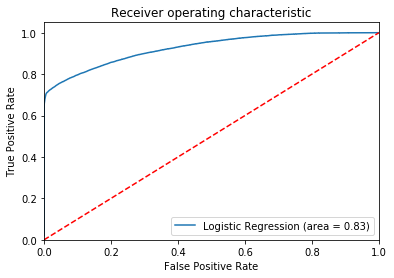

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()